When to use KNN?
1) When Data is labeled
2) Data is noise free
3) Datset must be small (it is lazy learner)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head


<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [13]:
diabetes.fillna({"Glucose":diabetes["Glucose"].mean()},inplace= True)
diabetes.fillna({"BloodPressure":diabetes["BloodPressure"].mean()},inplace= True)
diabetes.fillna({"SkinThickness":diabetes["SkinThickness"].mean()},inplace= True)
diabetes.fillna({"Insulin":diabetes["Insulin"].mean()},inplace= True)
diabetes.fillna({"Age":diabetes["Age"].mean()},inplace= True)
diabetes.fillna({"BMI":diabetes["BMI"].mean()},inplace= True)

<Axes: >

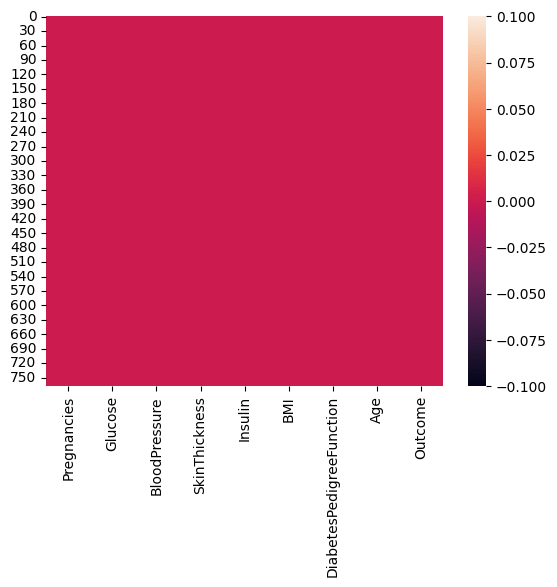

In [14]:
sns.heatmap(diabetes.isnull())

In [16]:
from sklearn.model_selection import train_test_split
x = diabetes.iloc[:, :-1 ]
y = diabetes.iloc[:, -1]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [ ]:
stan_scaler = StandardScaler()
x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

In [21]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [22]:
classifer = KNeighborsClassifier(n_neighbors= 11, p = 2, metric="euclidean")

In [23]:
classifer.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [24]:
y_pred = classifer.predict(x_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[91 16]
 [19 28]]


In [26]:
print(f1_score(y_test, y_pred))

0.6153846153846154


In [27]:
print(accuracy_score(y_test, y_pred))

0.7727272727272727
